# Log Likelihood

### Introduction

In the last lesson, we learned about the likelihood function.  We saw that with the likelihood, we calculate the chance that a given probability is correct, given what we observed.  In this lesson, we'll move towards finding the maxmimum likelihood -- that is, finding the parameter that is most likely.

### Reviewing the likelihood

Now remember that we found the likelihood by finding the chance of a parameter, $p$, given our observed evidence.  So, we were able to calculate the likelihoods of various parameters, p, passing them into our likelihood function.



$L(\theta) = \prod_{i = 1}^n \theta^{x_i}(1 - \theta)^{1 - x_i}$

Remember, that each $x_i$ is an event, indicated by a 1 or 0.  And we can capture the sequence of an events with a list:

In [4]:
events = [1, 1, 1, 1, 0]

From here, we can calculate the likelihood of different parameters, $p$, with the following:

In [7]:
import numpy as np
def likelihood_of_event(x, p):
    return (p**x)*(1 - p)**(1 - x)

def likelihood_of_sequence(events, p):
    return np.prod(np.array([prob_of_event(event, p) for event in events]))

Then we initialize our probabilities, and plot the likelihoods of each.

In [21]:
import numpy as np
probs = .05*np.arange(1, 20)
likelihoods = [likelihood_of_sequence(events, prob) for prob in probs]

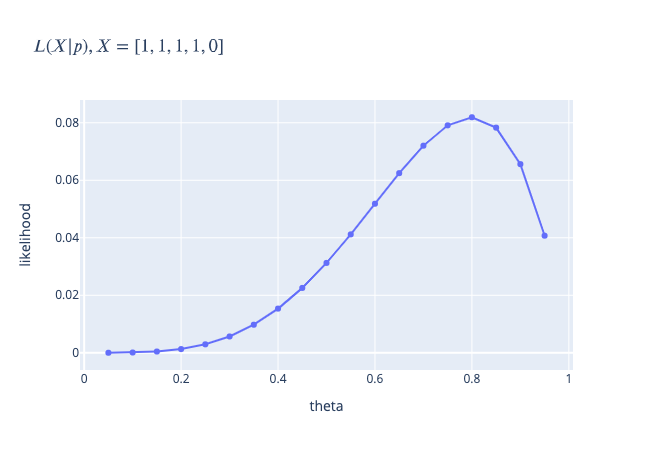

In [22]:
import plotly.graph_objects as go
scatter = go.Scatter(x = probs, y = likelihoods)

layout = {'title': '$L(X|p),   X = [1, 1, 1, 1, 0]$', 'xaxis': {'title': 'theta '}, 'yaxis': {'title': 'likelihood'}}
go.Figure([scatter],  layout = layout)

### Finding the max likelihood

Now as you can see from the above, we can find the maximum likelihood to finding the place where the slope of our likelihood function equals zero.

$\underset{
\theta}{argmax} L(\theta) = \prod_{i = 1}^n \theta^{x_i}(1 - \theta)^{1 - x_i}$

And we may remember from calculus, that we can find where the slope equals zero, by taking the derivative of our function and setting it equal to zero.  The issue is that finding this particular derivative is quite tricky.  So instead we take the log of the likelihood function, to make our function easier and then take the derivative of that.

$\underset{
\theta}{argmax} L(\theta) \rightarrow \underset{
\theta}{argmax} LL(\theta)$ 

Can we just go from finding the likelihood to finding the log likelihood?  Well, yes.  This is valid move, because the value of theta that maximizes the likelihood, will also maximize the log likelihood.  Let's see this graphically.

In [24]:
likelihoods_ar = np.array(likelihoods)
log_likelihoods = np.log(likelihoods_ar)
# likelihoods_ar

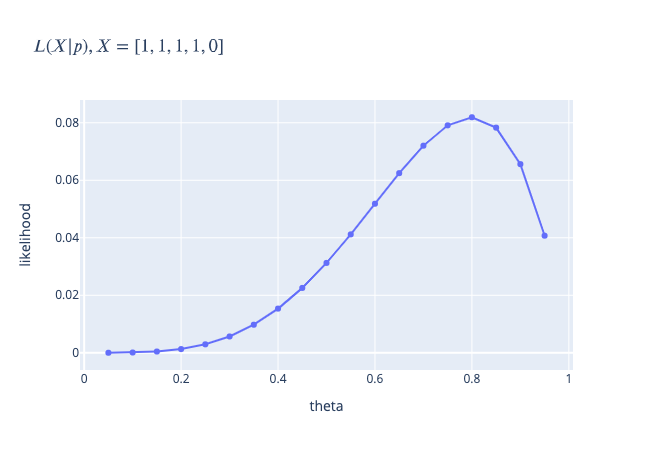

In [26]:
log_like_fig = go.Figure([scatter],  layout = layout)
log_like_fig

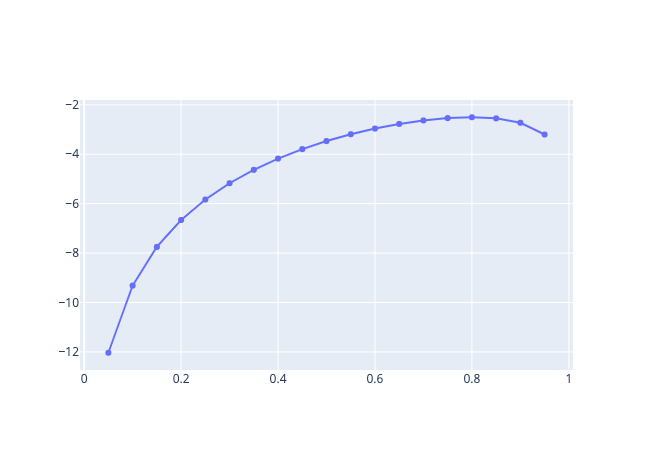

In [27]:
log_scatter = go.Scatter(x = probs, y = log_likelihoods)
go.Figure(log_scatter)

We can see that the maximum of both curves falls where $\theta = .8$.

So the idea, is that instead of finding the argmax of the likelihood, we can find the max of argmax of the loglikelihood, and we will get the same value of $\theta$.

### Log Likelihood

So let's do it.  We'll start with the likelihood function, we'll apply the log to it, and then we'll find the arg max of the log likelihood.

1. Start with the likelihood function

$L(\theta) = \underset {\theta}{argmax} \prod_{i = 1}^n p^{x_i}(1 - p)^{1 - x_i}$

2. Apply the log likelihood

If we apply the log to the likelihood function we get the following:

$LL(\theta) = \underset {\theta}{argmax} \sum_{i = 1}^n log(p^{x_i}(1 - p)^{1 - x_i}) $

$= \sum_{i = 1}^n X_i(log p) + (1-X_i) log (1 - p) $

> Now let's simplify the above equation, by setting $Y = \sum_{i = 1}^n X_i $.  Then, the equation above looks like the following:

$ LL(\theta) = Y*log(p) + (n-Y) *log (1 - p) $

3. Find the maximum value of the log likelihood

So we have now have calculated the log likelihood of our bernoulli random variable.  To find the value, $p$ that maximizes the $LL(\theta)$, we can find the derivative of the log likelihood and set it equal to zero.  This will be the value of theta that maximizes our likelihood.

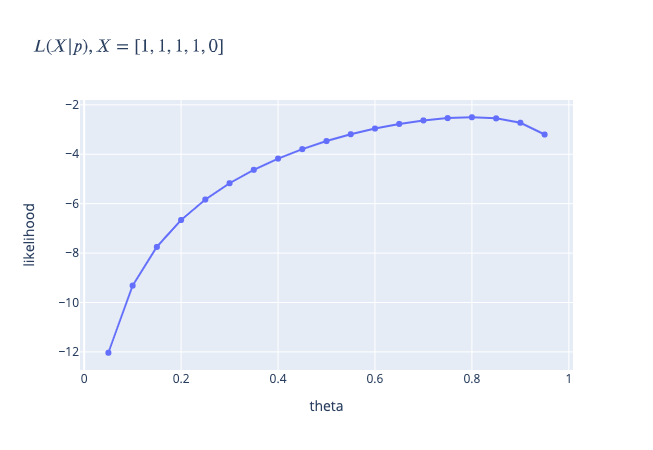

In [28]:
log_like_fig

### Finding the max

Ok, so now let's move from the log likelihood of theta, to calculating the argmax log likelihood.  To do so we start with our log likelihood function:

$ LL(\theta) = Y*log(p) + (n-Y) *log (1 - p) $

And then take the derivative of $LL(\theta)$, and set it equal to zero.  This will be the $\theta$ that maximizes our likelihood.  Ok, let's do it.

$\frac{\delta LL(p)}{\delta p } = Y\frac{1}{p} + (n - Y) \frac{-1}{1 - p} = 0$

$Y\frac{1}{p} + (n - Y) \frac{-1}{1 - p} = 0$

$p_{MLE} = \frac{Y}{n} = \frac{1}{n} \sum_{x = 1}^n X_i$ 

So we see that the probability that maximizes the a random variable X, for a bernoulli distribution, is the average value of $X$.  While, this is pretty intuitive, going through this exercise will be helpful for understanding logistic regression.  As the optimization procedure of logistic regression is also an application of finding the maximum likelihood of a bernoulli random variable.

### Summary

In this lesson, we saw how to find the parameter using the maximimum likelihood procedure.  To do so, we take the likelihood function.

$L(\theta) = \underset {\theta}{argmax} \prod_{i = 1}^n p^{x_i}(1 - p)^{1 - x_i}$

And then we apply the log to this function.

$LL(\theta) = \underset {\theta}{argmax} \sum_{i = 1}^n log(p^{x_i}(1 - p)^{1 - x_i}) = \sum_{i = 1}^n X_i(log p) + (1-X_i) log (1 - p) $

This is a valid move because the argmaxes $f(x)$ and $log(f(x))$ are always equal.  

Using the log likelihood simplified our equation.  So now, we can find where the log likelihood equals zero.

$\frac{\delta LL(p)}{\delta p } = Y\frac{1}{p} + (n - Y) \frac{-1}{1 - p} = 0$

$p_{MLE} = \frac{Y}{n} = \frac{1}{n} \sum_{x = 1}^n X_i$ 

So this is the maximum likelihood procedure for finding the parameters of theta -- finding the maximum of the log likelihood.